In [6]:
import smtf_utility as util
from pinn_magnetic import MultiDipoleModel



In [7]:
p, v, old_calc = util.parse_mtf(fname="tests\ATMS\Test 5.mtf", scaled=True)

positions, values = util.shuffle_data(p, v)

In [8]:
mdmodels = []

# Each model will have same number of poles as index
maxmodels = 7
maxepochs = 30

for i in range(maxmodels):
    mdmodels.append(MultiDipoleModel(poles=pow(2, i), lrate=1000))


In [9]:
# train the models on a smaller number of epochs
for i in range(maxmodels):
    print("----- Model ", i, " -----")
    mdmodels[i].fit(positions, values, epochs=maxepochs)

----- Model  0  -----
epoch  0 --- Loss --- 2.1063495e-06
epoch  1 --- Loss --- 2.0194532e-06
epoch  2 --- Loss --- 1.9387808e-06
epoch  3 --- Loss --- 1.8638857e-06
epoch  4 --- Loss --- 1.7943543e-06
epoch  5 --- Loss --- 1.7298022e-06
epoch  6 --- Loss --- 1.6698724e-06
epoch  7 --- Loss --- 1.6142341e-06
epoch  8 --- Loss --- 1.5625794e-06
epoch  9 --- Loss --- 1.5146236e-06
epoch  10 --- Loss --- 1.4701011e-06
epoch  11 --- Loss --- 1.4287663e-06
epoch  12 --- Loss --- 1.3903909e-06
epoch  13 --- Loss --- 1.3547632e-06
epoch  14 --- Loss --- 1.321686e-06
epoch  15 --- Loss --- 1.2909771e-06
epoch  16 --- Loss --- 1.2624666e-06
epoch  17 --- Loss --- 1.2359974e-06
epoch  18 --- Loss --- 1.2114231e-06
epoch  19 --- Loss --- 1.188608e-06
epoch  20 --- Loss --- 1.1674264e-06
epoch  21 --- Loss --- 1.147761e-06
epoch  22 --- Loss --- 1.1295037e-06
epoch  23 --- Loss --- 1.1125534e-06
epoch  24 --- Loss --- 1.0968166e-06
epoch  25 --- Loss --- 1.0822065e-06
epoch  26 --- Loss --- 1.0686

In [10]:
# find the model with the smallest fit error
for i in range(maxmodels):
    print("Dipoles", pow(2,i), "Loss: ", mdmodels[i].loss_history[-1])

Dipoles 1 Loss:  1.0335032e-06
Dipoles 2 Loss:  9.1313507e-07
Dipoles 4 Loss:  9.0487873e-07
Dipoles 8 Loss:  9.2036345e-07
Dipoles 16 Loss:  9.508962e-07
Dipoles 32 Loss:  1.0068779e-06
Dipoles 64 Loss:  1.1007847e-06


0
1
2
3
4
5
6


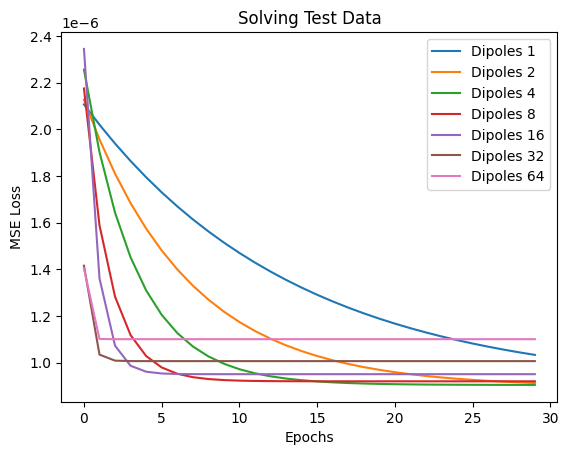

In [11]:
import matplotlib.pyplot as plt

x = range(maxepochs)

# plot lines 
for i in range(maxmodels):
    print(i)
    plt.plot(x, mdmodels[i].loss_history, label = "Dipoles " + str(pow(2,i)))
 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title('Solving Test Data')
plt.legend() 
plt.show()